In [1]:
%matplotlib notebook 

import numpy
import scipy.spatial.distance
import matplotlib.pyplot as plot

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [3]:
numpy.random.seed(1234)

In [4]:
# data set generation
n_dim = 2

n_mean1 = numpy.array([-1., -1.])
n_cov1 = numpy.diag([0.5, .5])
n_mean2 = numpy.array([1., 1.])
n_cov2 = numpy.diag([0.5, .5])

p_mean1 = numpy.array([-1., 1.])
p_cov1 = numpy.diag([.5, .5])
p_mean2 = numpy.array([1., -1.])
p_cov2 = numpy.diag([.5, .5])

# generate postive examples
n_pos = 50
pos_y = numpy.ones(n_pos * 2) 
pos_x = numpy.concatenate([numpy.random.randn(n_pos, n_dim) * numpy.diag(p_cov1)[None, :] + p_mean1[None,:],
                           numpy.random.randn(n_pos, n_dim) * numpy.diag(p_cov2)[None, :] + p_mean2[None,:]])
n_pos *= 2
# generate negative examples
n_neg = 50
neg_y = numpy.zeros(n_neg * 2) 
neg_x = numpy.concatenate([numpy.random.randn(n_neg, n_dim) * numpy.diag(n_cov1)[None, :] + n_mean1[None,:],
                           numpy.random.randn(n_neg, n_dim) * numpy.diag(n_cov2)[None, :] + n_mean2[None,:]])
n_neg *= 2
# combine them
y = numpy.concatenate([pos_y, neg_y])
x = numpy.concatenate([pos_x, neg_x], axis=0)
# shuffle them
si = numpy.random.permutation(n_pos + n_neg)
y = y[si]
x = x[si]

# grab training examples
n_tra = numpy.round(0.5 * (n_pos + n_neg)).astype(numpy.int)

y_tra = y[:n_tra]
x_tra = x[:n_tra]

y_tes = y[n_tra:]
x_tes = x[n_tra:]

In [5]:
def knn_classify(x_, x, y, metric='euclidean', k=1):
    if len(x_.shape) < 2:
        x_ = x_.reshape([1,-1])
    dists = scipy.spatial.distance.cdist(x_, x, metric)
    sidx = numpy.argpartition(dists, k, axis=1)[:,:k]
    y_ = numpy.zeros(len(x_))
    for ii, xx_ in enumerate(x_):
        yy_, yc_ = numpy.unique(y[sidx[ii,:]], return_counts=True)
        y_[ii] = yy_[numpy.argmax(yc_)]
    return y_

In [6]:
k = 20
metric = 'euclidean'

In [7]:
# visualize data 
def vis_data(x, y = None, c='r'):
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [8]:
def vis_decision_boundary(typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    pred = knn_classify(numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1), x_tra, y_tra, metric, k)
    
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


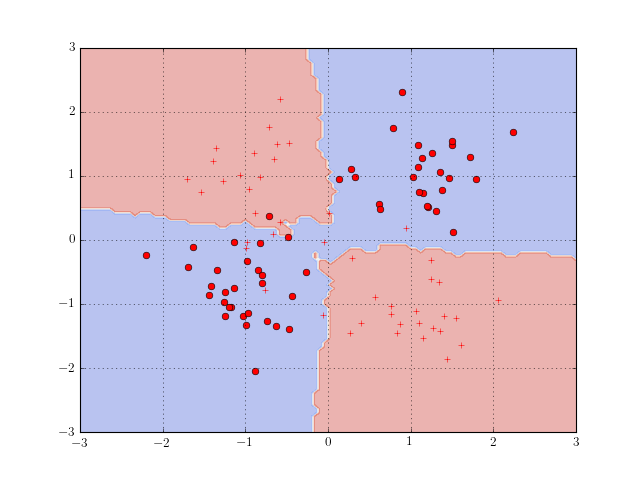

In [9]:
plot.figure()

vis_data(x_tra, y_tra, c='r')

plt1 = vis_decision_boundary('k--')

plot.show()

In [10]:
tra_er = numpy.sum(numpy.abs(knn_classify(x_tra, x_tra, y_tra, metric, k) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(knn_classify(x_tes, x_tra, y_tra, metric, k) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.08, Test error rate 0.05
